In [53]:
import pickle
import matplotlib
import numpy as np
import typing as t
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from timebase.data.static import *
from timebase.utils import tensorboard

In [54]:
tensorboard.set_font()

In [55]:
mania_1 = {
    "Session_Code": 0,
    "HDRS1": 0,
    "HDRS2": 0,
    "HDRS3": 0,
    "HDRS4": 0,
    "HDRS5": 0,
    "HDRS6": 0,
    "HDRS7": 0,
    "HDRS8": 0,
    "HDRS9": 2,
    "HDRS10": 0,
    "HDRS11": 0,
    "HDRS12": 0,
    "HDRS13": 0,
    "HDRS14": 0,
    "HDRS15": 0,
    "HDRS16": 0,
    "HDRS17": 2,
    "YMRS1": 4,
    "YMRS2": 2,
    "YMRS3": 3,
    "YMRS4": 2,
    "YMRS5": 2,
    "YMRS6": 2,
    "YMRS7": 3,
    "YMRS8": 6,
    "YMRS9": 2,
    "YMRS10": 1,
    "YMRS11": 3,
}

mania_2 = {
    "Session_Code": 1,
    "HDRS1": 0,
    "HDRS2": 0,
    "HDRS3": 0,
    "HDRS4": 0,
    "HDRS5": 0,
    "HDRS6": 2,
    "HDRS7": 0,
    "HDRS8": 0,
    "HDRS9": 4,
    "HDRS10": 0,
    "HDRS11": 0,
    "HDRS12": 0,
    "HDRS13": 0,
    "HDRS14": 0,
    "HDRS15": 0,
    "HDRS16": 0,
    "HDRS17": 1,
    "YMRS1": 2,
    "YMRS2": 4,
    "YMRS3": 0,
    "YMRS4": 1,
    "YMRS5": 8,
    "YMRS6": 2,
    "YMRS7": 1,
    "YMRS8": 2,
    "YMRS9": 8,
    "YMRS10": 1,
    "YMRS11": 1,
}

depression_1 = {
    "Session_Code": 2,
    "HDRS1": 3,
    "HDRS2": 2,
    "HDRS3": 2,
    "HDRS4": 1,
    "HDRS5": 0,
    "HDRS6": 0,
    "HDRS7": 0,
    "HDRS8": 2,
    "HDRS9": 4,
    "HDRS10": 4,
    "HDRS11": 4,
    "HDRS12": 0,
    "HDRS13": 0,
    "HDRS14": 0,
    "HDRS15": 1,
    "HDRS16": 0,
    "HDRS17": 1,
    "YMRS1": 0,
    "YMRS2": 1,
    "YMRS3": 0,
    "YMRS4": 0,
    "YMRS5": 2,
    "YMRS6": 0,
    "YMRS7": 0,
    "YMRS8": 0,
    "YMRS9": 0,
    "YMRS10": 0,
    "YMRS11": 0,
}

depression_2 = {
    "Session_Code": 3,
    "HDRS1": 3,
    "HDRS2": 2,
    "HDRS3": 2,
    "HDRS4": 4,
    "HDRS5": 4,
    "HDRS6": 4,
    "HDRS7": 0,
    "HDRS8": 1,
    "HDRS9": 0,
    "HDRS10": 0,
    "HDRS11": 2,
    "HDRS12": 0,
    "HDRS13": 0,
    "HDRS14": 0,
    "HDRS15": 0,
    "HDRS16": 2,
    "HDRS17": 2,
    "YMRS1": 0,
    "YMRS2": 2,
    "YMRS3": 0,
    "YMRS4": 0,
    "YMRS5": 0,
    "YMRS6": 0,
    "YMRS7": 0,
    "YMRS8": 0,
    "YMRS9": 0,
    "YMRS10": 0,
    "YMRS11": 2,
}

YMRS_COLORS = {
    0: "#FFBA08",
    1: "#F48C06",
    2: "#DC2F02",
    3: "#9D0208",
    4: "#370617",
}
YMRS_ITEMS = [f"YMRS{i}" for i in range(1, 12)]
HDRS_COLORS = {
    0: "#CAF0F8",
    1: "#90E0EF",
    2: "#00B4D8",
    3: "#0077B6",
    4: "#03045E",
}
HDRS_ITEMS = [f"HDRS{i}" for i in range(1, 18)]

LABEL_FONTSIZE, TICK_FONTSIZE, WEDGE_FONTSIZE = 9, 8, 6
WEDGEPROPS = {
    "antialiased": True,
    "width": 0.3,
    "linewidth": 0.5,
    "edgecolor": "black",
}

saved plot to plots/circle_plots.svg.


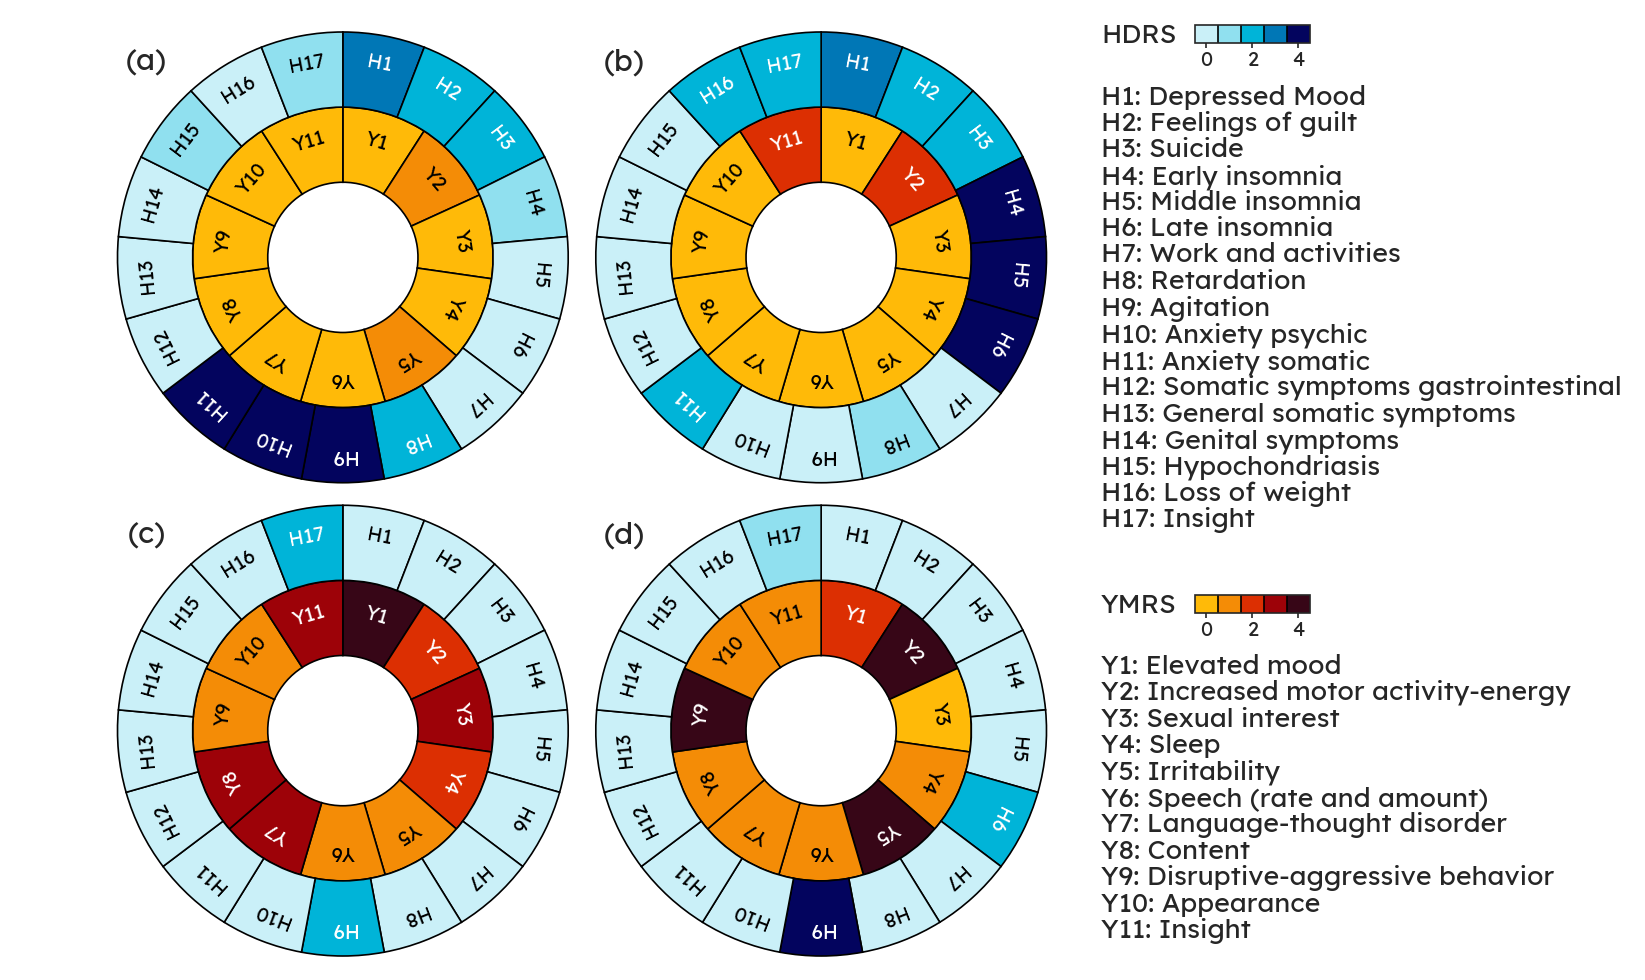

In [56]:
def plot_circle(ax: matplotlib.axes.Axes, data: pd.Series):
    textprops = {"fontsize": WEDGE_FONTSIZE, "color": "black"}

    ymrs = [data[item] / RANK_NORMALIZER[item] for item in YMRS_ITEMS]
    wedges1, labels1 = ax.pie(
        [1] * len(ymrs),
        colors=[YMRS_COLORS[v] for v in ymrs],
        labels=[item.replace("MRS", "") for item in YMRS_ITEMS],
        startangle=90,
        counterclock=False,
        radius=0.6,
        wedgeprops=WEDGEPROPS,
        labeldistance=0.8,
        textprops=textprops,
    )

    hdrs = [data[item] / RANK_NORMALIZER[item] for item in HDRS_ITEMS]
    wedges2, labels2 = ax.pie(
        [1] * len(hdrs),
        colors=[HDRS_COLORS[v] for v in hdrs],
        labels=[item.replace("DRS", "") for item in HDRS_ITEMS],
        startangle=90,
        counterclock=False,
        radius=0.9,
        wedgeprops=WEDGEPROPS,
        labeldistance=0.875,
        textprops=textprops,
    )

    # rotate labels in wedges
    for wedges, labels, values in [
        [wedges1, labels1, ymrs],
        [wedges2, labels2, hdrs],
    ]:
        for ea, eb, v in zip(wedges, labels, values):
            mang = (ea.theta1 + ea.theta2) / 2.0  # get mean_angle of the wedge
            eb.set_rotation(mang + 270)  # rotate the label by (mean_angle + 270)
            eb.set_va("center")
            eb.set_ha("center")
            if v >= 2:
                eb.set_color("white")

    ax.axis("equal")
    ax.margins(0, 0)


def add_labels(figure: plt.Figure, ax: matplotlib.axes.Axes):
    pos = ax.get_position()
    x = pos.x1 * 0.97
    y = pos.y1 * 0.99

    cbar_width, cbar_height = 0.08, 0.015
    cbar_pad = 0.065
    text_height = 0.022

    cbar_x0, cbar_y0 = x, y
    figure.text(
        x=cbar_x0,
        y=cbar_y0,
        s="HDRS",
        ha="left",
        va="baseline",
        fontsize=TICK_FONTSIZE,
    )
    hdrs_cbar_ax = figure.add_axes(
        rect=[cbar_x0 + cbar_pad, cbar_y0, cbar_width, cbar_height]
    )
    hdrs_cbar = figure.colorbar(
        cm.ScalarMappable(
            cmap=matplotlib.colors.ListedColormap(list(HDRS_COLORS.values()))
        ),
        cax=hdrs_cbar_ax,
        orientation="horizontal",
        drawedges=True,
    )
    tensorboard.set_xticks(
        axis=hdrs_cbar_ax,
        ticks_loc=np.linspace(1 / 5 / 2, 1 - 1 / 5 / 2, 3),
        ticks=np.array(list(HDRS_COLORS.keys())[::2], dtype=int),
        tick_fontsize=WEDGE_FONTSIZE,
    )
    hdrs_cbar_ax.tick_params(axis="both", which="both", length=1.5, pad=1, width=0.5)
    hdrs_cbar.outline.set_linewidth(0.5)
    hdrs_cbar.dividers.set_color("black")
    hdrs_cbar.dividers.set_linewidth(0.5)

    y -= cbar_height + 0.02
    HDRS_LABELS = [
        "H1: Depressed Mood",
        "H2: Feelings of guilt",
        "H3: Suicide",
        "H4: Early insomnia",
        "H5: Middle insomnia",
        "H6: Late insomnia",
        "H7: Work and activities",
        "H8: Retardation",
        "H9: Agitation",
        "H10: Anxiety psychic",
        "H11: Anxiety somatic",
        "H12: Somatic symptoms gastrointestinal",
        "H13: General somatic symptoms",
        "H14: Genital symptoms",
        "H15: Hypochondriasis",
        "H16: Loss of weight",
        "H17: Insight",
    ]
    for label in HDRS_LABELS:
        figure.text(
            x=x,
            y=y,
            s=label,
            ha="left",
            va="top",
            fontsize=TICK_FONTSIZE,
        )
        y -= text_height

    y -= 3 * text_height

    figure.text(
        x=cbar_x0,
        y=y,
        s="YMRS",
        ha="left",
        va="baseline",
        fontsize=TICK_FONTSIZE,
    )
    ymrs_cbar_ax = figure.add_axes(
        rect=[cbar_x0 + cbar_pad, y, cbar_width, cbar_height]
    )
    ymrs_cbar = figure.colorbar(
        cm.ScalarMappable(
            cmap=matplotlib.colors.ListedColormap(list(YMRS_COLORS.values()))
        ),
        cax=ymrs_cbar_ax,
        orientation="horizontal",
        drawedges=True,
    )
    tensorboard.set_xticks(
        axis=ymrs_cbar_ax,
        ticks_loc=np.linspace(1 / 5 / 2, 1 - 1 / 5 / 2, 3),
        ticks=np.array(list(YMRS_COLORS.keys())[::2], dtype=int),
        tick_fontsize=WEDGE_FONTSIZE,
    )
    ymrs_cbar_ax.tick_params(axis="both", which="both", length=1.5, pad=1, width=0.5)
    ymrs_cbar.outline.set_linewidth(0.5)
    ymrs_cbar.dividers.set_color("black")
    ymrs_cbar.dividers.set_linewidth(0.5)

    y -= cbar_height + 0.03
    YMRS_LABELS = [
        "Y1: Elevated mood",
        "Y2: Increased motor activity-energy",
        "Y3: Sexual interest",
        "Y4: Sleep",
        "Y5: Irritability",
        "Y6: Speech (rate and amount)",
        "Y7: Language-thought disorder",
        "Y8: Content",
        "Y9: Disruptive-aggressive behavior",
        "Y10: Appearance",
        "Y11: Insight",
    ]
    for label in YMRS_LABELS:
        figure.text(
            x=x,
            y=y,
            s=label,
            ha="left",
            va="center",
            fontsize=TICK_FONTSIZE,
        )
        y -= text_height


def plot_circles(data: t.List[pd.Series], filename: str = None):
    assert len(data) == 4
    figure, axes = plt.subplots(
        nrows=2,
        ncols=2,
        gridspec_kw={"wspace": -0.25, "hspace": 0.05},
        figsize=(6, 5),
        dpi=240,
        facecolor="white",
    )

    sub_labels = ["(a)", "(b)", "(c)", "(d)"]
    for i, ax in enumerate(axes.flatten()):
        plot_circle(ax=ax, data=data[i])
        pos = ax.get_position()
        figure.text(
            x=pos.x0 + 0.085,
            y=pos.y1 - 0.025,
            s=sub_labels[i],
            ha="center",
            va="center",
            fontsize=LABEL_FONTSIZE,
        )

    add_labels(figure=figure, ax=axes[0, 1])

    axes[0, 0].margins(x=0)
    axes[1, 0].margins(x=0)
    if filename:
        tensorboard.save_figure(figure, filename=filename, dpi=240, close=False)
        print(f"saved plot to {filename}.")

    plt.show()
    plt.close(figure)


plot_circles(
    data=[
        pd.Series(data=list(d.values()), index=list(d.keys()))
        for d in [depression_1, depression_2, mania_1, mania_2]
    ],
    filename="plots/circle_plots.svg",
)